# Lab 6: Calculations

## Part 1: Differential Pressure Measurments

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [11]:
dirPath = os.path.realpath('.')
fileName = 'rawData/measurements.xlsx'
filePath = os.path.join(dirPath, fileName)
df = pd.read_excel(filePath,sheetname="Part1",header=0)
print(df)

    deltah(cm)  V (mV)  error (mV)  deltah(cm).1  V (mV).1  error
0            0       1           1           -75      -270      1
1           -5     -17           1           -70      -255      1
2          -10     -34           1           -65      -239      1
3          -15     -54           1           -60      -222      1
4          -20     -67           1           -55      -206      1
5          -25     -86           1           -50      -189      1
6          -30    -106           1           -45      -171      1
7          -35    -122           1           -40      -155      1
8          -40    -141           1           -35      -136      1
9          -45    -160           1           -30      -119      1
10         -50    -177           1           -25      -102      1
11         -55    -194           1           -20       -84      1
12         -60    -213           1           -15       -66      1
13         -65    -232           1           -10       -48      1
14        

### Plotting

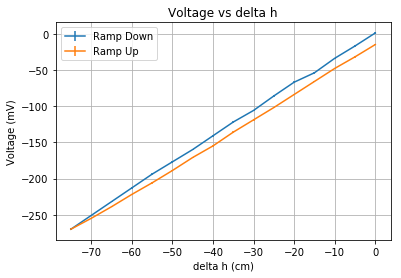

In [20]:
plt.figure(1)
plt.errorbar(df[cols[0]],df[cols[1]],yerr=df[cols[2]])
plt.errorbar(df[cols[3]],df[cols[4]],yerr=df[cols[5]])
plt.title('Voltage vs delta h')
plt.xlabel('delta h (cm)')
plt.ylabel('Voltage (mV)')
plt.legend(['Ramp Down','Ramp Up'])
plt.grid()
plt.show()

### Plot again, but zoom in so that error bars are visible

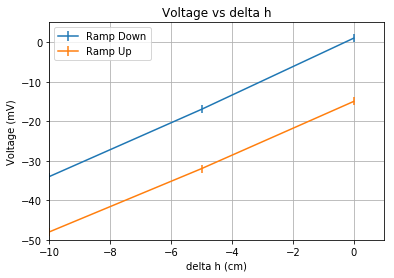

In [24]:
plt.figure(1)
plt.errorbar(df[cols[0]],df[cols[1]],yerr=df[cols[2]])
plt.errorbar(df[cols[3]],df[cols[4]],yerr=df[cols[5]])
plt.title('Voltage vs delta h')
plt.xlabel('delta h (cm)')
plt.ylabel('Voltage (mV)')
plt.legend(['Ramp Down','Ramp Up'])
plt.axis([-10,1,-50,5])
plt.grid()
plt.savefig
plt.show()

### Effects of Hysteresis

In [30]:
hysteresisOffset = df[cols[1]][0]-df[cols[4]][len(df[cols[4]])-1]
print(hysteresisOffset,'mV')

16 mV


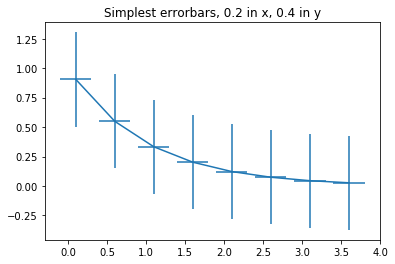

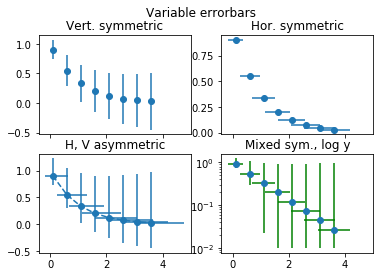

In [14]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

plt.show()